# Tasca M7 T01

Exercicis d'algoritmes de Classificació.

### Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [103]:
# Load libraries
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [104]:
col_names = ['Cultivars','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavano id phenols','Proanthocy anins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wines = pd.read_csv("wineData.txt", header=None, names=col_names)

wines.head()


,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavano id phenols,Proanthocy anins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [105]:
#split dataset in features and target variable
feature_cols = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavano id phenols','Proanthocy anins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
X = wines[feature_cols] # Features
y = wines.Cultivars # Target variable


In [106]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75% training and 25% test


MODEL A - Decision Tree

In [107]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dt_clf.predict(X_test)


MODEL B - KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

### Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

- CONFUSION MATRIX

++ Model A

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



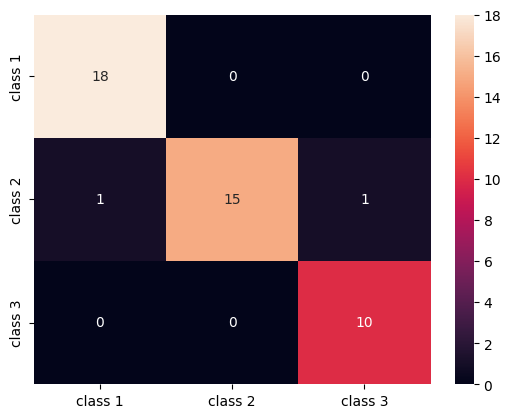

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_dt), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_dt))

++ Model B

              precision    recall  f1-score   support

           1       0.94      0.89      0.91        18
           2       0.63      0.71      0.67        17
           3       0.33      0.30      0.32        10

    accuracy                           0.69        45
   macro avg       0.64      0.63      0.63        45
weighted avg       0.69      0.69      0.69        45



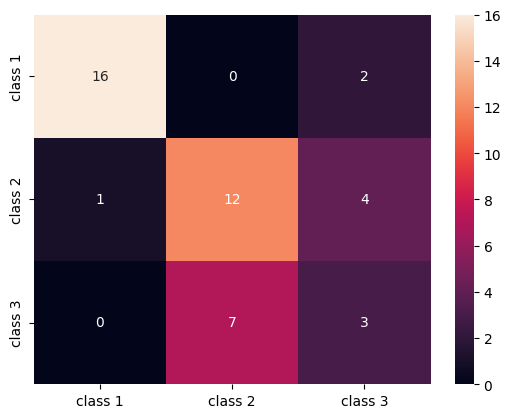

In [121]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), 
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_knn))

Els resultats mostren que s'han classificat 45 entrades amb una precisió del 96% al model A i un 69% al model B. De les métriques per cada una de les classes, es pot observar que el model A té la millor precisió per la classe 3 (100%), mentre el model B és la classe 1 (94%). La pitjor del model A és la classe 2 (94%), en canvi la del model B és la 3 (33%). En qualsevol cas, es pot afirmar que el model A és més precís.

Respecte al f1-score, el model A permet predir correctament totes les classes. En canvi, el model B prediu majoritariament bé les classes 1 i 2, mentre la classe 3 només permet predir un terç dels valors correctament.

Pel que fa la matriu de confusió, ens indica que al model A s'ha confós 1 entrada de la classe 1 amb la classe 2. Pel que fa el model B  de la classe 3 s'han confós 7 entrades com si fossin de la classe 2 i 2 de la classe 2 com si fossin de la 3. 

### Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

- Modificant el paràmetre f1-score

In [111]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

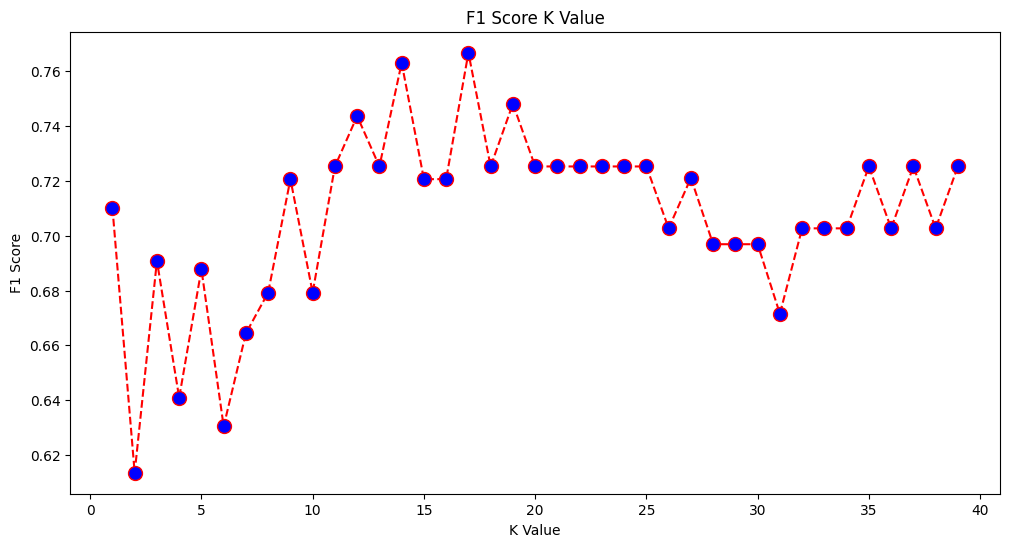

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Donat que el màxim valor de F1-score (0.7667) s'obté quan K-value=16, millorarem la classificació fent servir aquest valor.

In [113]:
classifier16 = KNeighborsClassifier(n_neighbors=16)
classifier16.fit(X_train, y_train)
y_pred16 = classifier16.predict(X_test)
print(classification_report(y_test, y_pred16))

              precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           2       0.71      0.71      0.71        17
           3       0.42      0.50      0.45        10

    accuracy                           0.71        45
   macro avg       0.69      0.68      0.68        45
weighted avg       0.73      0.71      0.72        45



### Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [114]:
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)

In [115]:
mean_dt_score = np.mean(dt_scores)
std_dt_score = np.std(dt_scores)

mean_knn_score = np.mean(knn_scores)
std_knn_score = np.std(knn_scores)


In [116]:
print("Decision Tree Mean Accuracy:", mean_dt_score)
print("Decision Tree Standard Deviation:", std_dt_score)

print("KNN Mean Accuracy:", mean_knn_score)
print("KNN Standard Deviation:", std_knn_score)


Decision Tree Mean Accuracy: 0.9324786324786325
Decision Tree Standard Deviation: 0.02758682264822839
KNN Mean Accuracy: 0.6837606837606838
KNN Standard Deviation: 0.0473569065887011


Els resultats obtinguts a partir d'una 'corss-validation', indiquen una millor precisió del model A (decision tree) que el model B (KNN) i una desviació de gairebé el 5% en ambdós casos. Per tant, el model A té un millor rendiment, donat que és més precís.

### Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)


Estandarització de la base de dades

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_trainT = scaler.transform(X_train)
X_testT = scaler.transform(X_test)

In [118]:
col_names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavano id phenols','Proanthocy anins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
scaled_df = pd.DataFrame(X_trainT, columns=col_names)
scaled_df.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavano id phenols,Proanthocy anins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.093977,-0.557879,-0.957529,-0.812987,0.602004,1.180371,1.021742,-0.743746,0.801107,0.000157,-0.332934,1.081639,0.471259
1,-0.815037,-1.226791,-1.506457,-1.489936,2.718621,-0.567133,-0.121876,-0.158431,2.052185,-0.686666,0.432278,-0.366970,0.024107
2,0.990366,-0.763698,1.238184,-0.043726,2.426674,1.100939,0.763185,1.095816,-0.364280,0.150924,1.240002,0.594126,1.630543
3,1.533249,-0.712243,0.433089,-0.966839,0.674991,1.656963,1.946581,-0.409281,0.509760,1.532946,1.154978,0.343406,3.104490
4,0.939865,-0.849456,0.506280,-0.905298,0.674991,1.815827,1.688024,-1.496294,0.818245,0.737236,-0.290423,0.413050,1.796155
